In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback

In [2]:
# Load the diabetes dataset
diabetes_dataset = load_diabetes()
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [3]:
# Assign variables to store the data and the targets
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

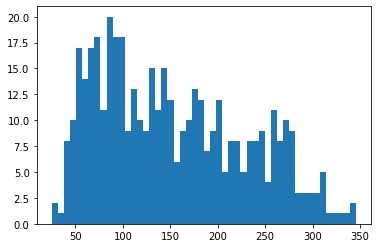

In [4]:
plt.figure(1)
plt.hist(targets, bins=50)
plt.show()

In [5]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()

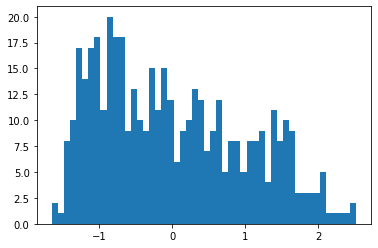

In [6]:
plt.figure(2)
plt.hist(targets, bins=50)
plt.show()

In [7]:
# Split the data into train and test sets
train_data, test_data, train_targets, test_targets = train_test_split(
    data, targets, test_size=0.1)

In [8]:
# A customer callback defined for the training process
class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting training...")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: starting batch {batch}")
              
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: finished batch {batch}")
              
    def on_batch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")
              
    def on_train_end(self, logs=None):
        print("Finished training")

In [9]:
rate = 0.3 # dropout rate

# Feedforward model with batch norm layers
model = Sequential([
    Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(1)
])

In [50]:
# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=['mae'])

In [11]:
# Fit the model
model.fit(train_data, train_targets, epochs=100,
         batch_size=64, validation_split=0.2, callbacks=[TrainingCallback()])

Starting training...
Epoch 1/100
Starting epoch 0
Training: starting batch 0
1/5 [=====>........................] - ETA: 4s - loss: 3.5759Training: finished batch 0
Training: starting batch 1
Training: finished batch 1
Training: starting batch 2
Training: finished batch 2
Training: starting batch 3
Training: finished batch 3
Training: starting batch 4
Training: finished batch 4
5/5 [==============================] - 2s 134ms/step - loss: 3.4286 - val_loss: 0.8621
Epoch 2/100
Starting epoch 1
Training: starting batch 0
1/5 [=====>........................] - ETA: 0s - loss: 2.3347Training: finished batch 0
Training: starting batch 1
Training: finished batch 1
Training: starting batch 2
Training: finished batch 2
Training: starting batch 3
Training: finished batch 3
Training: starting batch 4
Training: finished batch 4
5/5 [==============================] - 0s 28ms/step - loss: 2.4655 - val_loss: 0.8661
Epoch 3/100
Starting epoch 2
Training: starting batch 0
1/5 [=====>...................

5/5 [==============================] - 0s 10ms/step - loss: 1.5370 - val_loss: 0.8573
Epoch 20/100
Starting epoch 19
Training: starting batch 0
1/5 [=====>........................] - ETA: 0s - loss: 0.7812Training: finished batch 0
Training: starting batch 1
Training: finished batch 1
Training: starting batch 2
Training: finished batch 2
Training: starting batch 3
Training: finished batch 3
Training: starting batch 4
Training: finished batch 4
5/5 [==============================] - 0s 10ms/step - loss: 1.0167 - val_loss: 0.8672
Epoch 21/100
Starting epoch 20
Training: starting batch 0
1/5 [=====>........................] - ETA: 0s - loss: 1.1045Training: finished batch 0
Training: starting batch 1
Training: finished batch 1
Training: starting batch 2
Training: finished batch 2
Training: starting batch 3
Training: finished batch 3
Training: starting batch 4
Training: finished batch 4
5/5 [==============================] - 0s 10ms/step - loss: 1.1632 - val_loss: 0.8702
Epoch 22/100
Start

1/5 [=====>........................] - ETA: 0s - loss: 1.2722Training: finished batch 0
Training: starting batch 1
Training: finished batch 1
Training: starting batch 2
Training: finished batch 2
Training: starting batch 3
Training: finished batch 3
Training: starting batch 4
Training: finished batch 4
5/5 [==============================] - 0s 9ms/step - loss: 1.0636 - val_loss: 0.8669
Epoch 39/100
Starting epoch 38
Training: starting batch 0
1/5 [=====>........................] - ETA: 0s - loss: 1.0840Training: finished batch 0
Training: starting batch 1
Training: finished batch 1
Training: starting batch 2
Training: finished batch 2
Training: starting batch 3
Training: finished batch 3
Training: starting batch 4
Training: finished batch 4
5/5 [==============================] - 0s 10ms/step - loss: 0.9424 - val_loss: 0.8657
Epoch 40/100
Starting epoch 39
Training: starting batch 0
1/5 [=====>........................] - ETA: 0s - loss: 0.8891Training: finished batch 0
Training: startin

5/5 [==============================] - 0s 10ms/step - loss: 0.7907 - val_loss: 0.8742
Epoch 57/100
Starting epoch 56
Training: starting batch 0
1/5 [=====>........................] - ETA: 0s - loss: 0.8412Training: finished batch 0
Training: starting batch 1
Training: finished batch 1
Training: starting batch 2
Training: finished batch 2
Training: starting batch 3
Training: finished batch 3
Training: starting batch 4
Training: finished batch 4
5/5 [==============================] - 0s 10ms/step - loss: 0.8214 - val_loss: 0.8440
Epoch 58/100
Starting epoch 57
Training: starting batch 0
1/5 [=====>........................] - ETA: 0s - loss: 0.7406Training: finished batch 0
Training: starting batch 1
Training: finished batch 1
Training: starting batch 2
Training: finished batch 2
Training: starting batch 3
Training: finished batch 3
Training: starting batch 4
Training: finished batch 4
5/5 [==============================] - 0s 10ms/step - loss: 0.7135 - val_loss: 0.8416
Epoch 59/100
Start

1/5 [=====>........................] - ETA: 0s - loss: 0.5993Training: finished batch 0
Training: starting batch 1
Training: finished batch 1
Training: starting batch 2
Training: finished batch 2
Training: starting batch 3
Training: finished batch 3
Training: starting batch 4
Training: finished batch 4
5/5 [==============================] - 0s 24ms/step - loss: 0.6442 - val_loss: 0.6722
Epoch 76/100
Starting epoch 75
Training: starting batch 0
1/5 [=====>........................] - ETA: 0s - loss: 0.5495Training: finished batch 0
Training: starting batch 1
Training: finished batch 1
Training: starting batch 2
Training: finished batch 2
Training: starting batch 3
Training: finished batch 3
Training: starting batch 4
Training: finished batch 4
5/5 [==============================] - 0s 10ms/step - loss: 0.6049 - val_loss: 0.6795
Epoch 77/100
Starting epoch 76
Training: starting batch 0
1/5 [=====>........................] - ETA: 0s - loss: 0.7657Training: finished batch 0
Training: starti

5/5 [==============================] - 0s 10ms/step - loss: 0.5349 - val_loss: 0.5922
Epoch 94/100
Starting epoch 93
Training: starting batch 0
1/5 [=====>........................] - ETA: 0s - loss: 0.4511Training: finished batch 0
Training: starting batch 1
Training: finished batch 1
Training: starting batch 2
Training: finished batch 2
Training: starting batch 3
Training: finished batch 3
Training: starting batch 4
Training: finished batch 4
5/5 [==============================] - 0s 9ms/step - loss: 0.5226 - val_loss: 0.5957
Epoch 95/100
Starting epoch 94
Training: starting batch 0
1/5 [=====>........................] - ETA: 0s - loss: 0.4857Training: finished batch 0
Training: starting batch 1
Training: finished batch 1
Training: starting batch 2
Training: finished batch 2
Training: starting batch 3
Training: finished batch 3
Training: starting batch 4
Training: finished batch 4
5/5 [==============================] - 0s 10ms/step - loss: 0.5370 - val_loss: 0.5999
Epoch 96/100
Starti

In [12]:
# You can also define a callback during the evaluation process
class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting testing...")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: starting batch {batch}")
              
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: finished batch {batch}")
              
    def on_batch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")
              
    def on_test_end(self, logs=None):
        print("Finished testing")

In [13]:
# Evaluate the model
model.evaluate(test_data, test_targets, verbose=2, callbacks=[TestingCallback()])

Starting testing...
Testing: starting batch 0
Testing: finished batch 0
Testing: starting batch 1
Testing: finished batch 1
2/2 - 0s - loss: 0.8204
Finished testing


0.8204417824745178

In [14]:
# Similarly we can also create a callback for model predictions
class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Starting predicting...")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Predicting: starting batch {batch}")
              
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Predicting: finished batch {batch}")
              
    def on_batch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")
              
    def on_predict_end(self, logs=None):
        print("Finished predicting")

In [15]:
# Get predictions from the model
model.predict(test_data, callbacks=[PredictionCallback()], verbose=2)

Starting predicting...
Predicting: starting batch 0
Predicting: finished batch 0
Predicting: starting batch 1
Predicting: finished batch 1
2/2 - 0s
Finished predicting


array([[-0.39093262],
       [-0.7862673 ],
       [-0.6887794 ],
       [ 0.05878257],
       [ 0.03196519],
       [-0.7498262 ],
       [ 0.22862847],
       [-0.5055863 ],
       [-0.48353332],
       [-0.5637872 ],
       [-0.60679865],
       [-0.760397  ],
       [-0.8327871 ],
       [-0.820203  ],
       [-0.66991836],
       [-0.9217755 ],
       [-0.6854082 ],
       [-0.13775876],
       [-0.7417716 ],
       [-0.8288577 ],
       [-0.5369203 ],
       [ 0.83554405],
       [-0.80999416],
       [-0.7676277 ],
       [-0.12848942],
       [-0.35717368],
       [ 0.5198148 ],
       [-0.6307942 ],
       [-0.39294076],
       [-0.24035755],
       [ 0.1145458 ],
       [ 0.01007382],
       [-0.6193914 ],
       [-0.32637745],
       [-0.5696589 ],
       [-0.4419432 ],
       [-0.8060169 ],
       [-0.360767  ],
       [-0.1372452 ],
       [-0.7759735 ],
       [-0.5593819 ],
       [-0.47432745],
       [-0.66692   ],
       [-0.45762238],
       [-0.89295447]], dtype=flo

# Defining a custom Callback

In [18]:
# Create a callback to access the loss and metric values of the model
class LossAndMetricCallback(Callback):
    
    def on_train_batch_end(self, batch, logs=None):
        if batch % 2 == 0:
            print("\n After batch {}, the loss is {:7.2f}.".format(batch, logs['loss']))
            
    def on_test_batch_end(self, batch, logs=None):
        print("\n After batch {}, the loss is {:7.2f}.".format(batch, logs['loss']))
        
    def on_epoch_end(self, epoch, logs=None):
        print("Epoch {}: Average loss is {:7.2f}, mean absolute error is {:7.2f}.".format(
                epoch, logs['loss'], logs['mae']))
        
    def on_predict_batch_end(self, batch, logs=None):
        print("Finished prediction on batch {}!".format(batch))

In [19]:
# Fit the model
model.fit(train_data, train_targets, epochs=100,
         batch_size=64, callbacks=[LossAndMetricCallback()])

Epoch 1/100
1/7 [===>..........................] - ETA: 5s - loss: 0.5216 - mae: 0.5850
 After batch 0, the loss is    0.52.

 After batch 2, the loss is    0.61.

 After batch 4, the loss is    0.60.

 After batch 6, the loss is    0.57.
7/7 [==============================] - 1s 3ms/step - loss: 0.5818 - mae: 0.6182
Epoch 0: Average loss is    0.57, mean absolute error is    0.61.
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4489 - mae: 0.5498
 After batch 0, the loss is    0.45.

 After batch 2, the loss is    0.48.

 After batch 4, the loss is    0.52.

 After batch 6, the loss is    0.51.
7/7 [==============================] - 0s 3ms/step - loss: 0.5058 - mae: 0.5720
Epoch 1: Average loss is    0.51, mean absolute error is    0.57.
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6373 - mae: 0.6613
 After batch 0, the loss is    0.64.

 After batch 2, the loss is    0.49.

 After batch 4, the loss is    0.52.

 After batch 6, the loss is 

1/7 [===>..........................] - ETA: 0s - loss: 0.3851 - mae: 0.5064
 After batch 0, the loss is    0.39.

 After batch 2, the loss is    0.43.

 After batch 4, the loss is    0.46.

 After batch 6, the loss is    0.47.
7/7 [==============================] - 0s 3ms/step - loss: 0.4360 - mae: 0.5433
Epoch 21: Average loss is    0.47, mean absolute error is    0.56.
Epoch 23/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3994 - mae: 0.5210
 After batch 0, the loss is    0.40.

 After batch 2, the loss is    0.53.

 After batch 4, the loss is    0.49.

 After batch 6, the loss is    0.49.
7/7 [==============================] - 0s 3ms/step - loss: 0.4819 - mae: 0.5617
Epoch 22: Average loss is    0.49, mean absolute error is    0.56.
Epoch 24/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4312 - mae: 0.5285
 After batch 0, the loss is    0.43.

 After batch 2, the loss is    0.41.

 After batch 4, the loss is    0.47.

 After batch 6, the loss is    0.48.

1/7 [===>..........................] - ETA: 0s - loss: 0.4608 - mae: 0.5280
 After batch 0, the loss is    0.46.

 After batch 2, the loss is    0.48.

 After batch 4, the loss is    0.47.

 After batch 6, the loss is    0.45.
7/7 [==============================] - 0s 3ms/step - loss: 0.4516 - mae: 0.5261
Epoch 42: Average loss is    0.45, mean absolute error is    0.53.
Epoch 44/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3800 - mae: 0.5051
 After batch 0, the loss is    0.38.

 After batch 2, the loss is    0.42.

 After batch 4, the loss is    0.44.

 After batch 6, the loss is    0.45.
7/7 [==============================] - 0s 3ms/step - loss: 0.4210 - mae: 0.5250
Epoch 43: Average loss is    0.45, mean absolute error is    0.54.
Epoch 45/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5304 - mae: 0.6053
 After batch 0, the loss is    0.53.

 After batch 2, the loss is    0.43.

 After batch 4, the loss is    0.43.

 After batch 6, the loss is    0.45.

1/7 [===>..........................] - ETA: 0s - loss: 0.3396 - mae: 0.4621
 After batch 0, the loss is    0.34.

 After batch 2, the loss is    0.42.

 After batch 4, the loss is    0.40.

 After batch 6, the loss is    0.42.
7/7 [==============================] - 0s 3ms/step - loss: 0.3999 - mae: 0.5060
Epoch 63: Average loss is    0.42, mean absolute error is    0.52.
Epoch 65/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5559 - mae: 0.5792
 After batch 0, the loss is    0.56.

 After batch 2, the loss is    0.45.

 After batch 4, the loss is    0.45.

 After batch 6, the loss is    0.43.
7/7 [==============================] - 0s 3ms/step - loss: 0.4545 - mae: 0.5345
Epoch 64: Average loss is    0.43, mean absolute error is    0.53.
Epoch 66/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3506 - mae: 0.4662
 After batch 0, the loss is    0.35.

 After batch 2, the loss is    0.37.

 After batch 4, the loss is    0.39.

 After batch 6, the loss is    0.38.

1/7 [===>..........................] - ETA: 0s - loss: 0.4096 - mae: 0.5143
 After batch 0, the loss is    0.41.

 After batch 2, the loss is    0.35.

 After batch 4, the loss is    0.37.

 After batch 6, the loss is    0.38.
7/7 [==============================] - 0s 3ms/step - loss: 0.3777 - mae: 0.4828
Epoch 84: Average loss is    0.38, mean absolute error is    0.49.
Epoch 86/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3446 - mae: 0.4541
 After batch 0, the loss is    0.34.

 After batch 2, the loss is    0.34.

 After batch 4, the loss is    0.38.

 After batch 6, the loss is    0.35.
7/7 [==============================] - 0s 3ms/step - loss: 0.3505 - mae: 0.4689
Epoch 85: Average loss is    0.35, mean absolute error is    0.47.
Epoch 87/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4274 - mae: 0.5536
 After batch 0, the loss is    0.43.

 After batch 2, the loss is    0.45.

 After batch 4, the loss is    0.39.

 After batch 6, the loss is    0.39.

In [20]:
# Evaluate the model
model.evaluate(test_data, test_targets, verbose=2, callbacks=[LossAndMetricCallback()])


 After batch 0, the loss is    0.90.

 After batch 1, the loss is    0.93.
2/2 - 0s - loss: 0.9341 - mae: 0.7627


[0.934086799621582, 0.7626619338989258]

In [21]:
# Get predictions from the model
model.predict(test_data, verbose=2, callbacks=[LossAndMetricCallback()])

Finished prediction on batch 0!
Finished prediction on batch 1!
2/2 - 0s


array([[ 0.613745  ],
       [-0.7648672 ],
       [-0.9248775 ],
       [ 0.33509323],
       [-0.4790194 ],
       [-0.7748435 ],
       [ 0.32043898],
       [ 0.5458553 ],
       [ 0.15522107],
       [-0.7155451 ],
       [-0.67694384],
       [-0.8393685 ],
       [-1.0530607 ],
       [-0.975545  ],
       [-0.51548874],
       [-1.0388272 ],
       [-0.74339646],
       [ 0.23138644],
       [-0.617802  ],
       [-1.3198166 ],
       [-0.25708285],
       [ 0.41513258],
       [-0.90968305],
       [-0.74967945],
       [-0.57438093],
       [-0.49649426],
       [ 1.1550509 ],
       [-0.89632416],
       [-0.4414843 ],
       [-0.5638791 ],
       [ 0.2081291 ],
       [ 0.1818149 ],
       [-0.7027743 ],
       [ 0.3858471 ],
       [ 0.05537266],
       [-0.6231588 ],
       [-1.0836759 ],
       [ 0.1430587 ],
       [ 0.28019285],
       [-0.44112054],
       [-0.6331344 ],
       [ 0.4631385 ],
       [-0.6090166 ],
       [-0.11809668],
       [-1.2221885 ]], dtype=flo

# Advanced Callback - Learning Rate Scheduler

The learning rate of the model will change as a function of the epoch number.

In [22]:
# Define tuples that contain the epoch number and new learning rate
lr_schedule = [(4, 0.03), (7, 0.02), (11, 0.005), (15, 0.007)]

# Define an auxillary function that returns the new learning rate based on the epoch number
def get_new_lr(epoch, lr):
    # Check if the epoch number exists in the defined schedule
    sched_epoch = [i for i in range(len(lr_schedule)) if lr_schedule[i][0] == int(epoch)]
    if len(sched_epoch) > 0:
        return lr_schedule[sched_epoch[0]][1]
    else:
        return lr

In [34]:
# Define the learning rate scheduler callback
class LRScheduler(Callback):
    
    def __init__(self, new_lr_fn):
        super(LRScheduler, self).__init__()
        self.new_lr_fn = new_lr_fn
    
    def on_epoch_begin(self, epoch, logs=None):
        # Get the current learning rate
        curr_lr = self.model.optimizer.lr.numpy()
        
        # Call the auxillary learning rate function
        new_lr = self.new_lr_fn(epoch, curr_lr)
        
        # Set the new learning rate as the current learning rate
        tf.keras.backend.set_value(self.model.optimizer.lr, new_lr)
        print("Learning rate for epoch {} is {:7.3f}".format(epoch, new_lr))
        

In [35]:
# Train the model
model.fit(train_data, train_targets, epochs=100, batch_size=64,
         callbacks=[LRScheduler(get_new_lr)])

Epoch 1/100
Learning rate for epoch 0 is   0.001
7/7 [==============================] - 0s 2ms/step - loss: 0.3365 - mae: 0.4682
Epoch 2/100
Learning rate for epoch 1 is   0.001
7/7 [==============================] - 0s 3ms/step - loss: 0.3556 - mae: 0.4721
Epoch 3/100
Learning rate for epoch 2 is   0.001
7/7 [==============================] - 0s 3ms/step - loss: 0.3439 - mae: 0.4696
Epoch 4/100
Learning rate for epoch 3 is   0.001
7/7 [==============================] - 0s 3ms/step - loss: 0.3679 - mae: 0.4863
Epoch 5/100
Learning rate for epoch 4 is   0.030
7/7 [==============================] - 0s 2ms/step - loss: 0.5575 - mae: 0.5896
Epoch 6/100
Learning rate for epoch 5 is   0.030
7/7 [==============================] - 0s 2ms/step - loss: 0.6890 - mae: 0.6805
Epoch 7/100
Learning rate for epoch 6 is   0.030
7/7 [==============================] - 0s 2ms/step - loss: 0.8408 - mae: 0.7373
Epoch 8/100
Learning rate for epoch 7 is   0.020
7/7 [==============================] - 0s 3ms/st

7/7 [==============================] - 0s 3ms/step - loss: 0.4283 - mae: 0.5348
Epoch 64/100
Learning rate for epoch 63 is   0.007
7/7 [==============================] - 0s 3ms/step - loss: 0.3755 - mae: 0.4967
Epoch 65/100
Learning rate for epoch 64 is   0.007
7/7 [==============================] - 0s 2ms/step - loss: 0.3957 - mae: 0.5067
Epoch 66/100
Learning rate for epoch 65 is   0.007
7/7 [==============================] - 0s 2ms/step - loss: 0.4476 - mae: 0.5258
Epoch 67/100
Learning rate for epoch 66 is   0.007
7/7 [==============================] - 0s 2ms/step - loss: 0.4160 - mae: 0.5152
Epoch 68/100
Learning rate for epoch 67 is   0.007
7/7 [==============================] - 0s 2ms/step - loss: 0.4137 - mae: 0.5279
Epoch 69/100
Learning rate for epoch 68 is   0.007
7/7 [==============================] - 0s 2ms/step - loss: 0.4568 - mae: 0.5457
Epoch 70/100
Learning rate for epoch 69 is   0.007
7/7 [==============================] - 0s 2ms/step - loss: 0.4012 - mae: 0.5080
Epo

There is a learning rate scheduler callback provided by the Tensorflow library. Let's try it out.

In [37]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [51]:
# Define the learning rate schedule function
def lr_sched(epoch, lr):
    if epoch % 2 == 0:
        return lr
    else:
        return lr + epoch/1000

In [52]:
# Train the model
model.fit(train_data, train_targets, epochs=100, batch_size=64,
         callbacks=[LearningRateScheduler(lr_sched, verbose=1)])

Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
7/7 [==============================] - 1s 3ms/step - loss: 1603737129014263808.0000 - mae: 949102528.0000
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0020000000474974513.
7/7 [==============================] - 0s 3ms/step - loss: 1649106912966344704.0000 - mae: 960255200.0000
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0020000000949949026.
7/7 [==============================] - 0s 3ms/step - loss: 1599191524606738432.0000 - mae: 945897232.0000
Epoch 4/100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.005000000094994903.
7/7 [==============================] - 0s 3ms/step - loss: 1611664229893406720.0000 - mae: 950902296.0000
Epoch 5/100

Epoch 00005: LearningRateScheduler reducing learning rate to 0.004999999888241291.
7/7 [==============================] - 0s 3ms/step - loss: 1594268186415464448.0000 - mae: 94

7/7 [==============================] - 0s 2ms/step - loss: 1523584105738928128.0000 - mae: 926592488.0000
Epoch 42/100

Epoch 00042: LearningRateScheduler reducing learning rate to 0.4419999930858612.
7/7 [==============================] - 0s 3ms/step - loss: 1532260042756063232.0000 - mae: 927020120.0000
Epoch 43/100

Epoch 00043: LearningRateScheduler reducing learning rate to 0.44200000166893005.
7/7 [==============================] - 0s 2ms/step - loss: 1500737525424062464.0000 - mae: 919132896.0000
Epoch 44/100

Epoch 00044: LearningRateScheduler reducing learning rate to 0.48500000166893004.
7/7 [==============================] - 0s 2ms/step - loss: 1471951675353726976.0000 - mae: 909076672.0000
Epoch 45/100

Epoch 00045: LearningRateScheduler reducing learning rate to 0.48500001430511475.
7/7 [==============================] - 0s 2ms/step - loss: 1507809927811301376.0000 - mae: 920940880.0000
Epoch 46/100

Epoch 00046: LearningRateScheduler reducing learning rate to 0.5300000143

7/7 [==============================] - 0s 2ms/step - loss: 631616267052122112.0000 - mae: 779655808.0000
Epoch 83/100

Epoch 00083: LearningRateScheduler reducing learning rate to 1.6820000410079956.
7/7 [==============================] - 0s 2ms/step - loss: 628574064406953984.0000 - mae: 775973592.0000
Epoch 84/100

Epoch 00084: LearningRateScheduler reducing learning rate to 1.7650000410079956.
7/7 [==============================] - 0s 2ms/step - loss: 623370505369419776.0000 - mae: 773692936.0000
Epoch 85/100

Epoch 00085: LearningRateScheduler reducing learning rate to 1.7649999856948853.
7/7 [==============================] - 0s 2ms/step - loss: 608922759371685888.0000 - mae: 764622280.0000
Epoch 86/100

Epoch 00086: LearningRateScheduler reducing learning rate to 1.8499999856948852.
7/7 [==============================] - 0s 2ms/step - loss: 611112599987159040.0000 - mae: 766196760.0000
Epoch 87/100

Epoch 00087: LearningRateScheduler reducing learning rate to 1.850000023841858.
7